<!DOCTYPE html>

<html>
  <head>
  </head>

  <body>
    <h1> Study of ethnic residential segregation and health outcomes with clustering analysis in Bradford, UK </h1>
    <p>The purpose of this file is to identify correlation between health outcomes, it’s disparities and residential segregation can be identified using statistical analysis</p> 
  </body>
</html>


> **Hypotheis testing**

Hypothesis testing is a statistical method to `identify if the hypothesis about a population parameter is supported by evidence in a sample`. It's a testing with a formal procedure to investigate if the specific prediction is true or not with evidence from the data.

## 1. Data Collection

In [46]:
# Importing required dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", lambda x: "%.4f" % x)
plt.style.use("ggplot")
%matplotlib inline

#EDA
import scipy.stats as stat
from scipy import stats
import pylab 
import scikit_posthocs as sp
pd.options.display.float_format = '{:,.4f}'.format
import random

import warnings
warnings.filterwarnings("ignore")

In [47]:
#Load the required dataset

data = pd.read_csv('Dataset/Processed_Data/processed_clustering_data.csv', index_col=0 )
data.head(2)

,LSOA,Asian_pct,Black_pct,White_pct,Others_pct,Health_Very_Good_pct,Health_Fair_pct,Health_Very_Bad_pct,Disabled_pct,Disability_limited_lot_pct,Disability_limited_little_pct,Disability_No_pct,Disability_phy_mental_yes_pct,Disability_phy_mental_no_pct,unpaid_care_up9to49_pct,unpaid_care_no_pct,unpaid_care_above50_pct
0,E01010568,2.4400,0.6400,95.1200,1.8000,83.0100,11.9800,5.0000,17.0400,6.0500,10.9900,82.9600,8.6100,74.3500,13.7400,90.8200,1.9100
1,E01010569,1.2000,0.9700,95.4400,2.3900,77.1600,14.6400,8.2000,24.2700,11.1100,13.1600,75.7300,6.8900,68.8300,11.3700,89.7200,4.2100


## 2. Hypothesis testing

**Hypothesis testing 1**

`H0 (null hypothesis)`: Living in a neighborhood with a highly segregated Asian ethnic group lead to poor health outcomes for individuals compared to living in a neighborhood with a lower segregated Asian ethnic group

`H1 (alternate hypothesis)`: Living in a neighborhood with a highly segregated Asian ethnic group lead to good health outcomes for individuals compared to living in a neighborhood with a lower segregated Asian ethnic group

In [48]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("The data is not normally distributed")
    else:
        print("The data is normally distributed")  

In [49]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("The variances of the samples are different.")
    else:
        print("The variances of the samples are same.")

In [50]:
# checking the normality of the census ethnic data

<AxesSubplot: xlabel='Others_pct', ylabel='Density'>

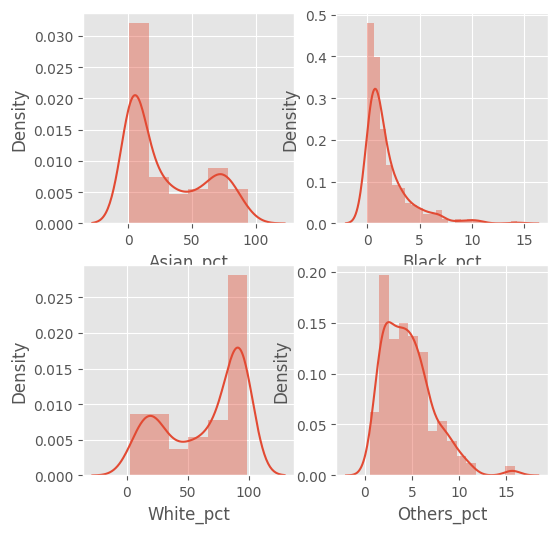

In [51]:
fig, ax = plt.subplots(2, 2, figsize = (6, 6))
sns.distplot(data['Asian_pct'], ax = ax[0,0])
sns.distplot(data['Black_pct'], ax = ax[0,1])
sns.distplot(data['White_pct'], ax = ax[1,0])
sns.distplot(data['Others_pct'], ax = ax[1,1])

Assuming that alpha=0.05 If p-value is >0.05, it can be said that data is normally distributed

In [52]:
#checking normality and variance for the first hypothesis

check_normality(data.Asian_pct)
check_normality(data.Health_Very_Good_pct)
check_variance_homogeneity(data.Asian_pct, data.Health_Very_Good_pct)

p value:0.0000
The data is not normally distributed
p value:0.0138
The data is not normally distributed
p value:0.0000
The variances of the samples are different.


In [53]:
#Wilcoxon signed-rank test

test,pvalue = stats.wilcoxon(data.Asian_pct, data.Health_Very_Good_pct) ##alternative default two sided
print("p-value:%.6f" %pvalue, ">> one_tailed_pval:%.6f" %(pvalue/2))

test,one_sided_pvalue = stats.wilcoxon(data.Asian_pct, data.Health_Very_Good_pct, alternative="less")
print("one sided pvalue:%.6f" %(one_sided_pvalue))
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.000000 >> one_tailed_pval:0.000000
one sided pvalue:0.000000
Reject null hypothesis


<div class="alert alert-block alert-info">
<b>Result:</b>

p-value is less than 0.05, therefore null hypothesis is rejected. Therefore, alternate hypothesis is accepted. 

Living in a neighborhood with a highly segregated Asian ethnic group lead to good health outcomes for individuals compared to living in a neighborhood with a lower segregated Asian ethnic group 

</div>

**Hypothesis testing 2**

`H0 (null hypothesis)`: Neighborhoods with higher black ethnic group have higher population with disabled percentage compared to neighborhoods with lower black ethnic density
    
`H1 (alternate hypothesis)`: Neighborhoods with higher black ethnic group have lesser population with disabled percentage compared to neighborhoods with lower black ethnic density

In [54]:
#checking normality and variance for the second hypothesis

check_normality(data.Black_pct)
check_normality(data.Disabled_pct)
check_variance_homogeneity(data.Black_pct, data.Disabled_pct)

p value:0.0000
The data is not normally distributed
p value:0.0000
The data is not normally distributed
p value:0.0000
The variances of the samples are different.


In [55]:
#Wilcoxon signed-rank test

test,pvalue = stats.wilcoxon(data.Black_pct, data.Disabled_pct) ##alternative default two sided
print("p-value:%.6f" %pvalue, ">> one_tailed_pval:%.6f" %(pvalue/2))

test,one_sided_pvalue = stats.wilcoxon(data.Black_pct, data.Disabled_pct, alternative="less")
print("one sided pvalue:%.6f" %(one_sided_pvalue))
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.000000 >> one_tailed_pval:0.000000
one sided pvalue:0.000000
Reject null hypothesis


<div class="alert alert-block alert-info">
<b>Result:</b>

p-value is less than 0.05, therefore null hypothesis is rejected. Therefore, alternate hypothesis is accepted.

Living in a neighborhoods with higher black ethnic group have lesser population with disabled percentage compared to neighborhoods with lower black ethnic density

</div>

**Hypothesis testting 3**

`Null hypothesis (H0)` : As the concentration of  white ethnic group increases in Bradford,the disabled people population in the neighbourhoods will decrease.

`Alternate hypothesis (H1)` : As the concentration of the white ethnic group increases in Bradford,the disabled people population in the neighbourhoods will also increase.

In [56]:
#checking normality and variance for the third hypothesis

check_normality(data.White_pct)
check_normality(data.Disabled_pct)
check_variance_homogeneity(data.White_pct, data.Disabled_pct)

p value:0.0000
The data is not normally distributed
p value:0.0000
The data is not normally distributed
p value:0.0000
The variances of the samples are different.


In [57]:
# Wilcoxon signed-rank test

test,pvalue = stats.wilcoxon(data.White_pct,data.Disabled_pct) ##alternative default two sided
print("p-value:%.6f" %pvalue, ">> one_tailed_pval:%.6f" %(pvalue/2))

test,one_sided_pvalue = stats.wilcoxon(data.White_pct,data.Disabled_pct, alternative="less")
print("one sided pvalue:%.6f" %(one_sided_pvalue))
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.000000 >> one_tailed_pval:0.000000
one sided pvalue:1.000000
Reject null hypothesis


<div class="alert alert-block alert-info">
<b>Result:</b>

p-value is less than 0.05, therefore null hypothesis is rejected. Alternate hypothesis is accepted. 

As the concentration of the white ethnic group increases in Bradford,the disabled people population in the neighbourhoods will also increase.

Eventhough neighbourhood having high native population of white ethnic group, disabled percentage of  population is high

</div>

**Hypothesis testing 4**

`H0 (null hypothesis)`: As the concertation of native ethnic group - white increases across Bradford, the density of neighbourhoods receiving unpaid health care provision will also increase

`H1 (alternate hypothesis)`: As the concertation of native ethnic group - white increases across Bradford, the density of neighbourhoods receiving unpaid health care provision will decrease

In [58]:
#checking normality and variance for the fourth hypothesis

check_normality(data.White_pct)
check_normality(data.unpaid_care_up9to49_pct)
check_variance_homogeneity(data.White_pct, data.unpaid_care_up9to49_pct)

p value:0.0000
The data is not normally distributed
p value:0.1393
The data is normally distributed
p value:0.0000
The variances of the samples are different.


In [59]:
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

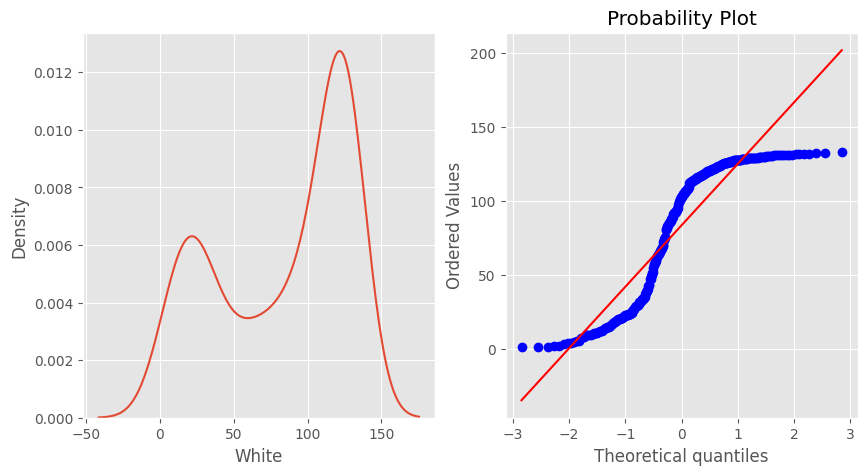

In [60]:
#The Box-Cox transformation 
data['White'],parameters=stats.boxcox(data['White_pct'])
normality(data,'White')

In [61]:
# t-test dependent

test_stat, p_value_paired = stats.ttest_rel(data.White_pct,data.unpaid_care_up9to49_pct)
print("p value:%.6f" % p_value_paired , "one tailed p value:%.6f" %(p_value_paired/2))
if p_value_paired <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000 one tailed p value:0.000000
Reject null hypothesis


<div class="alert alert-block alert-info">
<b>Result:</b>
    
p-value is less than 0.05, therefore null hypothesis is rejected. Alternate hypothesis is accepted.
    
At this significance level, there is enough evidence to conclude that the average concertation of native ethnic group
    
white increases across Bradford, the density of neighbourhoods receiving unpaid health care provision will decrease
</div>

**Hypothesis testing 5**

`H0 (null hypothesis)`: The experience of providing unpaid health care services vary among different ethnic groups

`H1 (alternate hypothesis)`: The experience of providing unpaid health care services does not vary among different ethnic groups

In [62]:
data1 = data.Asian_pct
data2 = data.Black_pct
data3 = data.White_pct
data4 = data.Others_pct
data5 = data.unpaid_care_no_pct
data6 = data.unpaid_care_up9to49_pct
data7 = data.unpaid_care_above50_pct

In [63]:
#checking normality and variance for the fourth hypothesis

check_normality(data1)
check_normality(data2)
check_normality(data3)
check_normality(data4)
check_normality(data5)
check_normality(data6)
check_normality(data7)
check_variance_homogeneity(data5, data6)

print("p value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0000
The data is not normally distributed
p value:0.0000
The data is not normally distributed
p value:0.0000
The data is not normally distributed
p value:0.0000
The data is not normally distributed
p value:0.0000
The data is not normally distributed
p value:0.1393
The data is normally distributed
p value:0.0001
The data is not normally distributed
p value:0.0000
The variances of the samples are different.
p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


In [64]:
# Friedman Chi-Square

test_stat,p_value = stats.friedmanchisquare(data1, data2, data3, data4, data5)
print("p value:%.4f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
    
print(np.round(np.mean(data1),2), np.round(np.mean(data2),2), np.round(np.mean(data3),2), np.round(np.mean(data4),2), np.round(np.mean(data5),2), np.round(np.mean(data6),2), np.round(np.mean(data7),2))


p value:0.0000
Reject null hypothesis
29.67 1.91 63.82 4.6 90.99 11.42 2.8


<div class="alert alert-block alert-info">
<b>Result:</b> 

p-value is less than 0.05, therefore null hypothesis is rejected. Alternate hypothesis is accepted.
    
At this significance level, the experience of providing unpaid health care services does not vary among different ethnic groups
</div>

<div class="alert alert-block alert-success">
<b>Hypothesis result</b> 
    
The overall result statistically proves that there is no significant relationship between ethnic segregation and health outcome in Bradford
</div>